# Base Notebook (CP-ML)

My attempt to keep an organized and complete notebook. Sections should be cross-referenced.

#### Table of Contents

* [Data and Preprocessing](#Data-and-Preprocessing)
* [Visualization](#Visualization)
* [Feature Engineering](#Feature-Engineering)
* [Models](#Models)

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [108]:
import os
import glob

In [109]:
from cp import CIFParser, PDBParser, StructureParser

## [ &uarr;](#Table-of-Contents) Data and Preprocessing


In [110]:
data_d0 = 'E:/ic-exp-uobs/dens-0/'

In [111]:
cifs = np.array(glob.glob(os.path.join(data_d0, '*.cif')))
pdbs = np.array(glob.glob(os.path.join(data_d0, '*.pdb')))

In [112]:
def parse_multiple_structures(cif_list, pdb_list):
    multiple_struct_df = pd.DataFrame()
    for cif, pdb in zip(cif_list, pdb_list):
        structure = StructureParser(cif, pdb)
        structure.parse()
        multiple_struct_df = multiple_struct_df.append(structure.structure_df(pdb_id=True))
    return multiple_struct_df

In [113]:
def sample_files(n_structures, cif_list, pdb_list):
    permuted_indexes = np.random.permutation(len(cif_list))
    sampled_cifs = cif_list[permuted_indexes][:n_structures]
    sampled_pdbs = pdb_list[permuted_indexes][:n_structures]
    return sampled_cifs, sampled_pdbs

In [114]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [123]:
cif_sample, pdb_sample = sample_files(5, cifs, pdbs)

In [124]:
full_df = parse_multiple_structures(cif_sample, pdb_sample)

In [125]:
ms_df = reduce_mem_usage(full_df)

Memory usage of dataframe is 206.52 MB
Memory usage after optimization is: 46.79 MB
Decreased by 77.3%


In [127]:
ms_df.tail(10)

,index_h,index_k,index_l,FOBS,SIGFOBS,UOBS,SIGUOBS,FC,PHI,FOM,...,length_c,angle_alpha,angle_beta,angle_gamma,volume,SYNCHROTRON,SOLV,WILSON,MATTHEWS,ID
120782,25,10,3,6.191406,2.666016,0.001957,0.146240,0.012383,140.625000,0.132080,...,70.625,90.0,90.0,90.0,130633.242188,N,43.96875,NULL,2.189453,3wxq
120783,25,10,4,5.113281,1.912109,0.001625,0.146606,0.009041,148.875000,0.077148,...,70.625,90.0,90.0,90.0,130633.242188,N,43.96875,NULL,2.189453,3wxq
120784,25,10,5,4.390625,1.749023,0.001405,0.147095,0.012169,-11.046875,0.098083,...,70.625,90.0,90.0,90.0,130633.242188,N,43.96875,NULL,2.189453,3wxq
120785,25,11,1,3.603516,1.361328,0.001163,0.147583,0.022430,2.914062,0.128784,...,70.625,90.0,90.0,90.0,130633.242188,N,43.96875,NULL,2.189453,3wxq
120786,25,11,3,3.656250,1.392578,0.001188,0.148071,0.037292,173.250000,0.225342,...,70.625,90.0,90.0,90.0,130633.242188,N,43.96875,NULL,2.189453,3wxq
120787,25,11,4,4.511719,1.814453,0.001473,0.148438,0.048615,-4.988281,0.377930,...,70.625,90.0,90.0,90.0,130633.242188,N,43.96875,NULL,2.189453,3wxq
120788,25,12,0,2.886719,1.588867,0.000960,0.149536,0.008888,-90.000000,0.039154,...,70.625,90.0,90.0,90.0,130633.242188,N,43.96875,NULL,2.189453,3wxq
120789,26,-1,2,2.582031,0.929688,0.000852,0.149048,0.010498,3.998047,0.068420,...,70.625,90.0,90.0,90.0,130633.242188,N,43.96875,NULL,2.189453,3wxq
120790,26,0,2,5.238281,3.126953,0.001727,0.148926,0.034302,0.000000,0.315186,...,70.625,90.0,90.0,90.0,130633.242188,N,43.96875,NULL,2.189453,3wxq
120791,26,1,2,2.582031,0.929688,0.000852,0.149048,0.010498,176.000000,0.068420,...,70.625,90.0,90.0,90.0,130633.242188,N,43.96875,NULL,2.189453,3wxq


## [ &uarr;](#Table-of-Contents) Visualization

In [128]:
dropped_columns = ['pdbx_r_free_flag', 'crystal_system',
       'IT_number', 'name_H-M_alt', 'name_Hall', 'space_group_name_H-M',
       'space_group_name_Hall', 'Int_Tables_number', 'SYNCHROTRON', 'WILSON']

In [129]:
ms_df_drop = ms_df.drop(dropped_columns, axis=1)

In [130]:
ms_df_drop['COSPHI'] = np.cos(ms_df_drop['PHI'])

### General Histogram

C:\Users\Otto\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Otto\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


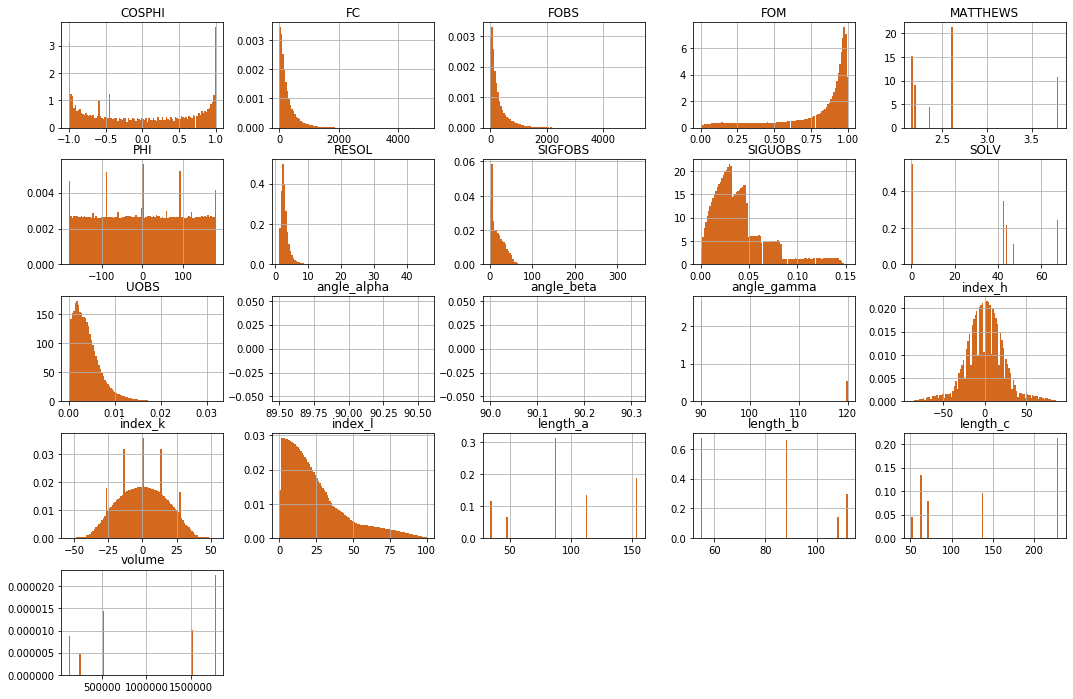

In [131]:
ms_df_drop.hist(figsize=(18,12), color='chocolate', bins=100, density=True)
plt.show()

#### Conclusions

* Very different data scales (for instance, ```UOBS``` and ```VOLUME```)
* ```PHI``` has a very uniform distribution with spikes associated with centrosymmetric reflections. ```COSPHI``` may be better than ```PHI``` because it solves the problem of circular boundary conditions on ```PHI```.
* Many distributions are heavy-tailed. Binning may an alternative (*e.g.* classes of resolution quality).

### Probing pairwise correlations

In [132]:
corr_matrix = ms_df_drop.corr()

In [133]:
from pandas.plotting import scatter_matrix

In [134]:
attribs=  ['COSPHI', 'UOBS', 'FOM', 'FOBS']

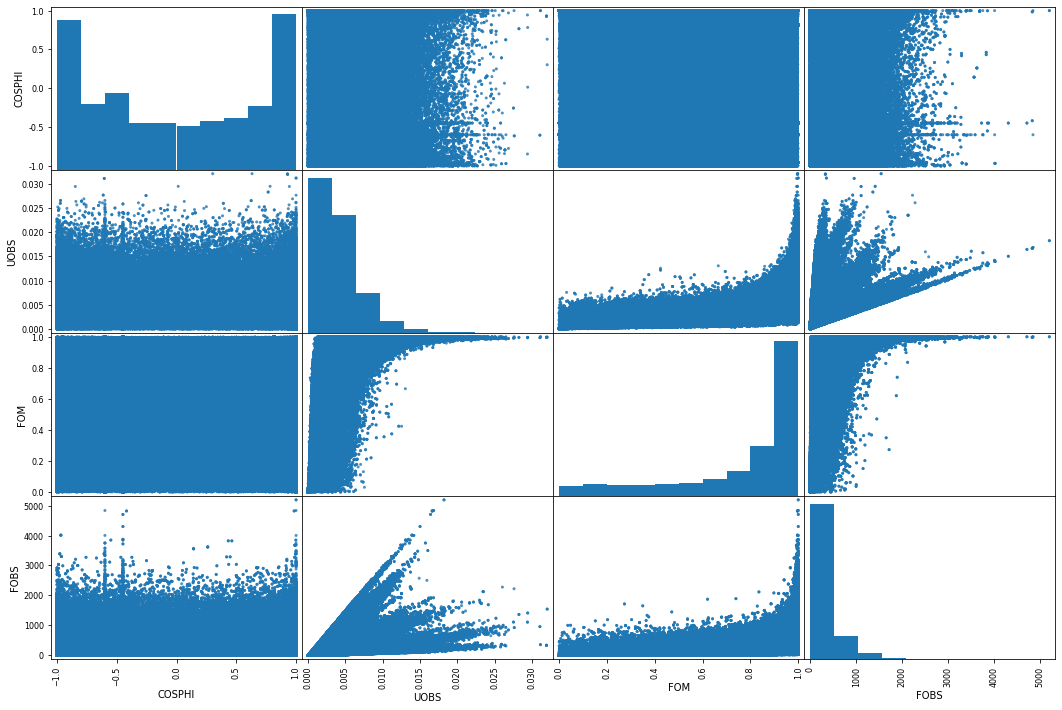

In [135]:
scatter_matrix(ms_df_drop[attribs], alpha=0.8, figsize=(18,12))
plt.show()

### Probing correlations in more dimensions

In [136]:
from mpl_toolkits.mplot3d import Axes3D

In [137]:
sampling_rate = 50

In [138]:
norm = plt.Normalize(vmin=-1, vmax=1)

In [139]:
mask = np.logical_and(ms_df_drop['RESOL'][::sampling_rate] < 4, (ms_df_drop['UOBS'][::sampling_rate] < 0.015))

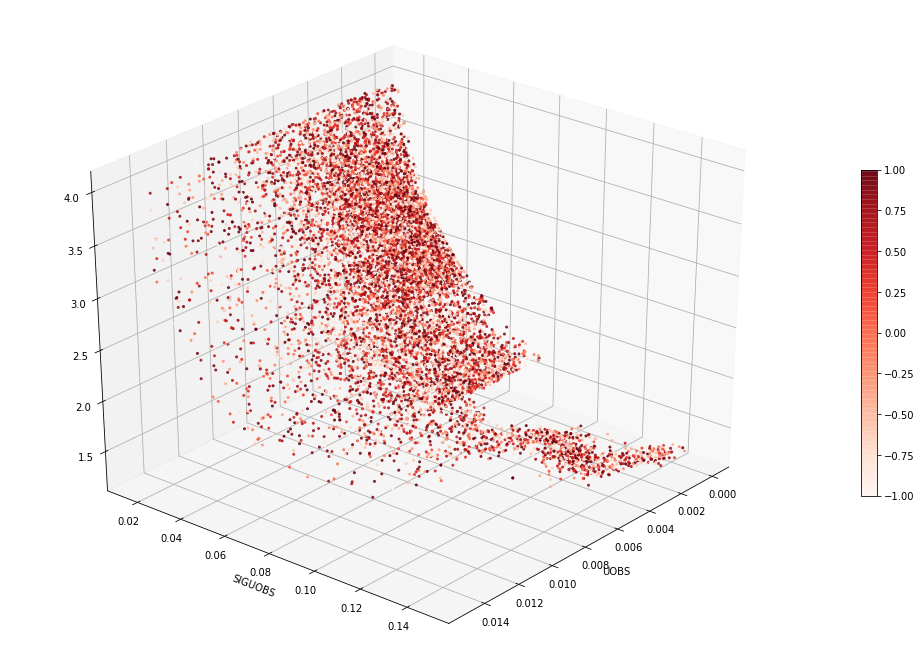

In [140]:
fig = plt.figure(figsize=(18,12))
ax = fig.gca(projection='3d')
sc = ax.scatter(ms_df_drop['UOBS'][::sampling_rate][mask], ms_df_drop['SIGUOBS'][::sampling_rate][mask],
                ms_df_drop['RESOL'][::sampling_rate][mask],
          'o',  c=ms_df_drop['COSPHI'][::sampling_rate][mask], norm=norm, cmap=plt.cm.Reds,  s=4 , alpha=0.8)
ax.set_xlabel('UOBS')
ax.set_ylabel('SIGUOBS')
plt.colorbar(sc, ax=ax, shrink=0.5)
ax.view_init(30, 40)
plt.show()

## [ &uarr;](#Table-of-Contents) Feature Engineering

In [141]:
labels = ms_df_drop['COSPHI']

In [142]:
ms_df_drop.drop(['COSPHI'], axis=1, inplace=True)

In [143]:
ms_df_drop.head(10)

,index_h,index_k,index_l,FOBS,SIGFOBS,UOBS,SIGUOBS,FC,PHI,FOM,...,length_a,length_b,length_c,angle_alpha,angle_beta,angle_gamma,volume,SOLV,MATTHEWS,ID
0,-23,-11,1,7.792969,8.078125,0.001021,0.062134,16.375000,151.125000,0.196289,...,47.15625,108.4375,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,1p27
1,-23,-11,2,16.750000,6.894531,0.002214,0.062408,19.609375,-35.406250,0.271973,...,47.15625,108.4375,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,1p27
2,-23,-10,1,19.187500,7.214844,0.002480,0.061676,20.671875,68.187500,0.287598,...,47.15625,108.4375,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,1p27
3,-23,-10,2,14.539062,7.558594,0.001896,0.061951,14.515625,133.750000,0.545410,...,47.15625,108.4375,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,1p27
4,-23,-10,3,8.195312,6.648438,0.001083,0.062408,17.312500,11.734375,0.305664,...,47.15625,108.4375,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,1p27
5,-23,-9,1,11.484375,6.453125,0.001466,0.061279,35.312500,59.531250,0.570312,...,47.15625,108.4375,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,1p27
6,-23,-9,2,61.375000,3.632812,0.007904,0.061554,46.187500,86.062500,0.945312,...,47.15625,108.4375,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,1p27
7,-23,-9,3,7.511719,6.355469,0.000981,0.062012,24.078125,135.125000,0.242188,...,47.15625,108.4375,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,1p27
8,-23,-8,1,62.031250,8.062500,0.007828,0.060913,43.937500,-155.000000,0.905273,...,47.15625,108.4375,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,1p27
9,-23,-8,2,31.437500,5.253906,0.004002,0.061188,32.125000,74.312500,0.736328,...,47.15625,108.4375,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,1p27


In [144]:
def miller_indexes_to_plane(df, indexes=['index_h', 'index_k', 'index_l'], 
                        axes=['length_a', 'length_b', 'length_c']):
    temp_df = df.copy()
    for index, ax in zip(indexes, axes):
        plane_name = 'plane_'+ index[-1]
        temp_df.loc[df[index] == 0, index] = np.inf
        df[plane_name] = temp_df[ax]/temp_df[index]
    return df

In [145]:
def angle_to_cos_rep(df, angles=['angle_alpha', 'angle_beta', 'angle_gamma']):
    for angle in angles:
        cos_angle_name = 'cos_angle_'+angle.split('_')[-1]
        df[cos_angle_name] = np.cos(df[angle])
    return df

In [146]:
ms_df_fe = miller_indexes_to_plane(ms_df_drop)

In [147]:
ms_df_fe = angle_to_cos_rep(ms_df_fe)

In [148]:
base_df = ms_df_fe.drop(['index_h', 'index_k', 'index_l', 'FOBS', 'SIGFOBS', 'FOM', 'ID', 'FC'], axis=1)

In [149]:
base_df

,UOBS,SIGUOBS,PHI,RESOL,length_a,length_b,length_c,angle_alpha,angle_beta,angle_gamma,volume,SOLV,MATTHEWS,plane_h,plane_k,plane_l,cos_angle_alpha,cos_angle_beta,cos_angle_gamma
0,0.001021,0.062134,151.125000,2.005859,47.15625,108.43750,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,-2.050272,-9.857955,50.937500,-0.447998,-0.655273,-0.447998
1,0.002214,0.062408,-35.406250,2.001953,47.15625,108.43750,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,-2.050272,-9.857955,25.468750,-0.447998,-0.655273,-0.447998
2,0.002480,0.061676,68.187500,2.013672,47.15625,108.43750,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,-2.050272,-10.843750,50.937500,-0.447998,-0.655273,-0.447998
3,0.001896,0.061951,133.750000,2.007812,47.15625,108.43750,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,-2.050272,-10.843750,25.468750,-0.447998,-0.655273,-0.447998
4,0.001083,0.062408,11.734375,2.001953,47.15625,108.43750,50.9375,90.0,90.25,90.0,260497.453125,47.09375,2.349609,-2.050272,-10.843750,16.979167,-0.447998,-0.655273,-0.447998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120787,0.001473,0.148438,-4.988281,1.297852,33.71875,54.84375,70.6250,90.0,90.00,90.0,130633.242188,43.96875,2.189453,1.348750,4.985795,17.656250,-0.447998,-0.447998,-0.447998
120788,0.000960,0.149536,-90.000000,1.292969,33.71875,54.84375,70.6250,90.0,90.00,90.0,130633.242188,43.96875,2.189453,1.348750,4.570312,0.000000,-0.447998,-0.447998,-0.447998
120789,0.000852,0.149048,3.998047,1.294922,33.71875,54.84375,70.6250,90.0,90.00,90.0,130633.242188,43.96875,2.189453,1.296875,-54.843750,35.312500,-0.447998,-0.447998,-0.447998
120790,0.001727,0.148926,0.000000,1.295898,33.71875,54.84375,70.6250,90.0,90.00,90.0,130633.242188,43.96875,2.189453,1.296875,0.000000,35.312500,-0.447998,-0.447998,-0.447998


In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler = StandardScaler()

In [152]:
scaler.fit(base_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [153]:
scaled = scaler.transform(base_df)

## [ &uarr;](#Table-of-Contents) Models

In [154]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
from sklearn.model_selection import cross_val_predict

In [156]:
rfr = RandomForestRegressor(n_estimators=80, max_depth=250, max_leaf_nodes=300)

In [157]:
scaled

array([[-9.94543151e-01,  7.13783412e-01,  1.45165281e+00, ...,
         0.00000000e+00, -3.42161020e+00, -4.49173120e-01],
       [-6.01942370e-01,  7.23112759e-01, -3.35742172e-01, ...,
         0.00000000e+00, -3.42161020e+00, -4.49173120e-01],
       [-5.14697752e-01,  6.98234501e-01,  6.56922325e-01, ...,
         0.00000000e+00, -3.42161020e+00, -4.49173120e-01],
       ...,
       [-1.05024790e+00,  3.66600333e+00,  4.18409013e-02, ...,
         0.00000000e+00,  2.92260059e-01, -4.49173120e-01],
       [-7.62309276e-01,  3.66185696e+00,  3.53048979e-03, ...,
         0.00000000e+00,  2.92260059e-01, -4.49173120e-01],
       [-1.05024790e+00,  3.66600333e+00,  1.69001207e+00, ...,
         0.00000000e+00,  2.92260059e-01, -4.49173120e-01]])

In [158]:
labels.values

array([ 0.9463, -0.661 ,  0.5996, ..., -0.6553,  1.    ,  0.9976],
      dtype=float16)

In [159]:
cv_rfr = cross_val_predict(rfr, scaled, labels.values, cv=2, verbose=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 26.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 26.6min finished


In [173]:
cv_rfr.shape

(845920,)

In [174]:
labels.shape

(845920,)

In [175]:
a = list(range(labels.shape[0]))

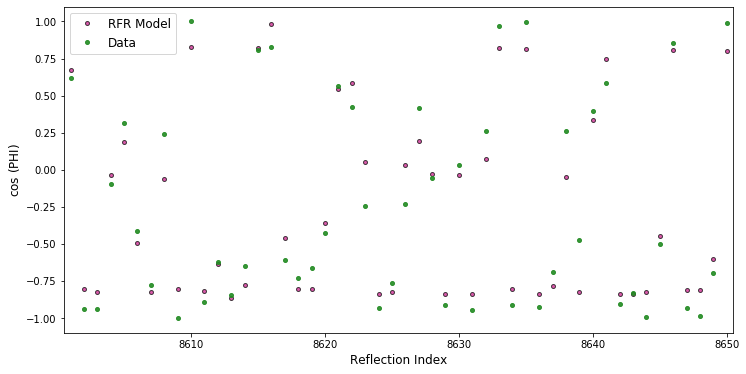

In [196]:
fig = plt.figure(figsize=(12,6))
plt.plot(a[::], cv_rfr[::], 'o', markersize=4, alpha=0.7, color='k', mfc='mediumvioletred', label='RFR Model')
plt.plot(a[::], labels[::], 'o', markersize=4, alpha=0.9, color='forestgreen', label='Data')
plt.xlim(8600.5, 8650.5)
plt.xlabel('Reflection Index', fontsize=12)
plt.ylabel(r'$\cos$ (PHI)', fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [177]:
from sklearn.metrics import mean_squared_error

In [178]:
cv_rfr_deg = np.arccos(cv_rfr)*180.0/np.pi

In [179]:
labels_deg = np.arccos(labels)*180.0/np.pi

In [180]:
mean_squared_error(cv_rfr, labels)

0.02296586369157594

In [181]:
np.sqrt(mean_squared_error(cv_rfr_deg, labels_deg.values))

15.408656394224513

In [182]:
np.arccos(labels)*180.0/np.pi

0          18.875000
1         131.375000
2          53.187500
3         103.312500
4          47.687500
             ...    
120787     74.250000
120788    116.625000
120789    131.000000
120790      0.000000
120791      4.003906
Name: COSPHI, Length: 845920, dtype: float16

In [183]:
cv_rfr_deg

array([ 38.13145208, 142.30849182,  50.80204509, ..., 141.57754119,
        12.9708586 ,  38.16797248])

In [184]:
labels_deg

0          18.875000
1         131.375000
2          53.187500
3         103.312500
4          47.687500
             ...    
120787     74.250000
120788    116.625000
120789    131.000000
120790      0.000000
120791      4.003906
Name: COSPHI, Length: 845920, dtype: float16

(array([0.00337363, 0.00654132, 0.01159671, 0.02013964, 0.02516273,
        0.02215809, 0.02058045, 0.01043292, 0.00633172, 0.00320169]),
 array([-38.290144  , -30.56926316, -22.84838233, -15.1275015 ,
         -7.40662067,   0.31426016,   8.03514099,  15.75602182,
         23.47690265,  31.19778348,  38.91866431]),
 <a list of 10 Patch objects>)

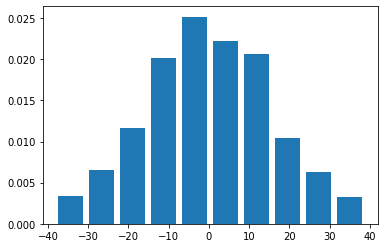

In [185]:
plt.hist(cv_rfr_deg-labels_deg.values, rwidth=0.8, density=True)